In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
from scipy import stats
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


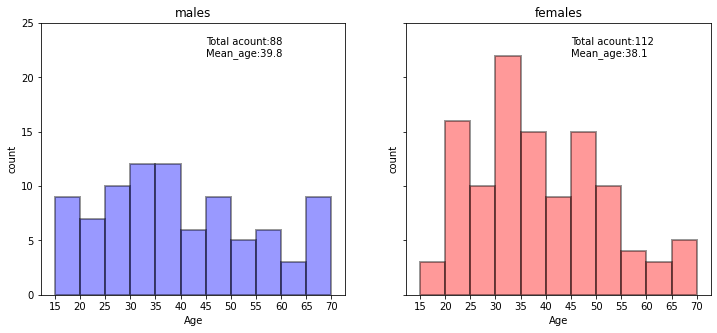

In [6]:
males_age=df[df['Gender']=='Male']['Age']
females_age=df[df['Gender']=='Female']['Age']
age_bins=range(15,75,5)
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.distplot(males_age,bins=age_bins,kde=False,color='blue',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('males')
ax1.set_ylabel('count')
ax1.text(45,23,'Total acount:{}'.format(males_age.count()))
ax1.text(45,22,'Mean_age:{:.1f}'.format(males_age.mean()))
sns.distplot(females_age,bins=age_bins,kde=False,color='red',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_ylim(top=25)
ax2.set_title('females')
ax2.set_ylabel('count')
ax2.text(45,23,'Total acount:{}'.format(females_age.count()))
ax2.text(45,22,'Mean_age:{:.1f}'.format(females_age.mean()))
plt.show()


In [7]:
print('p-value:{:.2f}'.format(stats.ks_2samp(males_age,females_age)[1]))

p-value:0.49


the average age of male customers is higher than female ones.distribution of male age is more uniform than females, where we can observe that the biggest age group is 30-35 years. and the difference between that 2 groups are statically insignificant.

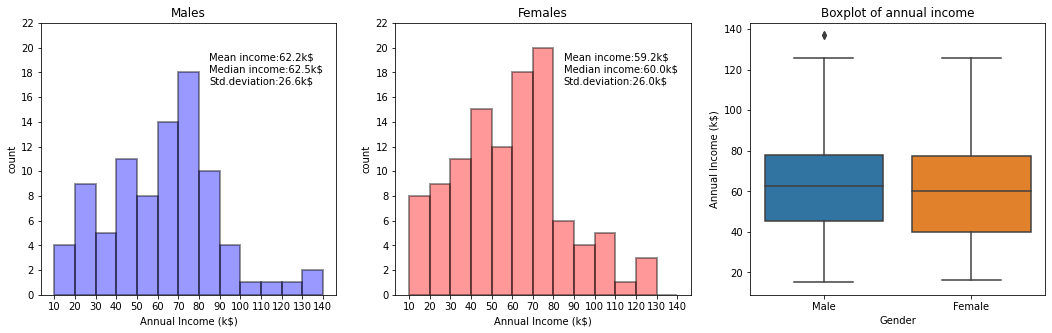

In [8]:
males_income=df[df['Gender']=='Male']['Annual Income (k$)']
females_income=df[df['Gender']=='Female']['Annual Income (k$)']
my_bins=range(10,150,10)
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_income,bins=my_bins,kde=False,color='blue',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('count')
ax1.text(85,19,'Mean income:{:.1f}k$'.format(males_income.mean()))
ax1.text(85,18,'Median income:{:.1f}k$'.format(males_income.median()))
ax1.text(85,17,'Std.deviation:{:.1f}k$'.format(males_income.std()))
sns.distplot(females_income,bins=my_bins,kde=False,color='red',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('count')
ax2.text(85,19,'Mean income:{:.1f}k$'.format(females_income.mean()))
ax2.text(85,18,'Median income:{:.1f}k$'.format(females_income.median()))
ax2.text(85,17,'Std.deviation:{:.1f}k$'.format(females_income.std()))
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df,ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [9]:
print('p-value:{:.2f}'.format(stats.ks_2samp(males_income,females_income)[1]))

p-value:0.78


mean income of males is higher than mean income of females also median income of males is higher than females. standard deviation is similar for both and the test shows that 2 groups are not statically different.

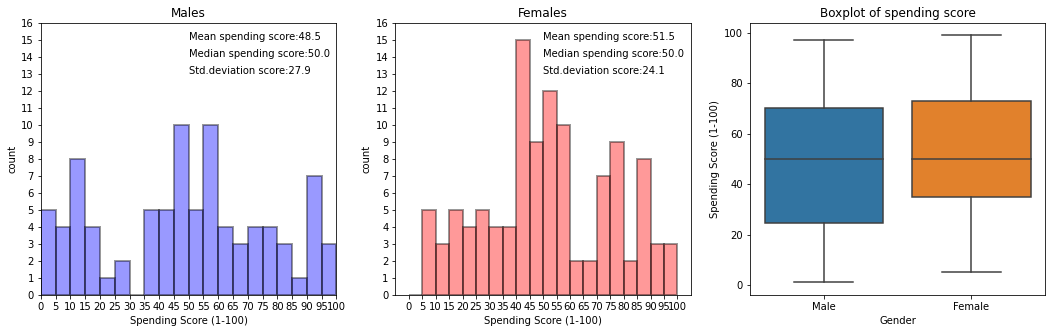

In [10]:
males_spending=df[df['Gender']=='Male']['Spending Score (1-100)']
females_spending=df[df['Gender']=='Female']['Spending Score (1-100)']
spending_bins=range(0,105,5)
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_spending,bins=spending_bins,kde=False,color='blue',ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('count')
ax1.text(50,15,'Mean spending score:{:.1f}'.format(males_spending.mean()))
ax1.text(50,14,'Median spending score:{:.1f}'.format(males_spending.median()))
ax1.text(50,13,'Std.deviation score:{:.1f}'.format(males_spending.std()))
sns.distplot(females_spending,bins=spending_bins,kde=False,color='red',ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))
ax2.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('count')
ax2.text(50,15,'Mean spending score:{:.1f}'.format(females_spending.mean()))
ax2.text(50,14,'Median spending score:{:.1f}'.format(females_spending.median()))
ax2.text(50,13,'Std.deviation score:{:.1f}'.format(females_spending.std()))
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df,ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

In [11]:
print('p-value:{:.2f}'.format(stats.ks_2samp(males_spending,females_spending)[1]))

p-value:0.29


mean spending score of females is higher than males also median spending score of females is equal  males. standard deviation of males greater than femalesnd the difference between that 2 groups are statically insignificant.

# correlation

In [12]:
from scipy.stats import pearsonr

# calculating pearsonr r

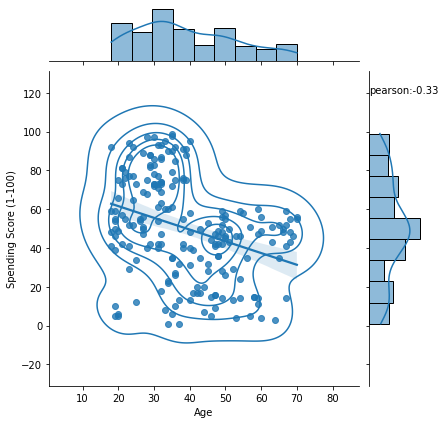

In [13]:
corr,_=pearsonr(df['Age'],df['Spending Score (1-100)'])
jp=(sns.jointplot('Age','Spending Score (1-100)',data=df,kind='reg')).plot_joint(sns.kdeplot,zorder=0,n_levels=6)
plt.text(0,120,'pearson:{:.2f}'.format(corr))
plt.show()

# visualizing pearson's correlation

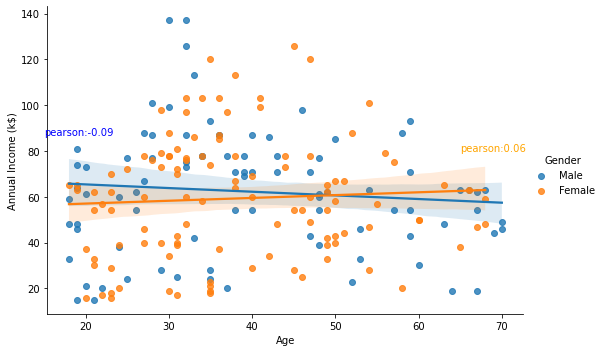

In [14]:
corr1,_=pearsonr(males_age.values,males_income.values)
corr2,_=pearsonr(females_age.values,females_income.values)
sns.lmplot('Age','Annual Income (k$)',data=df,hue='Gender',aspect=1.5)
plt.text(15,87,'pearson:{:.2f}'.format(corr1),color='blue')
plt.text(65,80,'pearson:{:.2f}'.format(corr2),color='orange')
plt.show()

there is no correlation between age and annual income

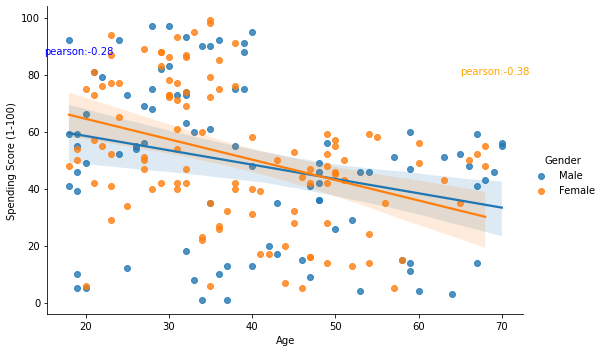

In [15]:
corr1,_=pearsonr(males_age.values,males_spending.values)
corr2,_=pearsonr(females_age.values,females_spending.values)
sns.lmplot('Age','Spending Score (1-100)',data=df,hue='Gender',aspect=1.5)
plt.text(15,87,'pearson:{:.2f}'.format(corr1),color='blue')
plt.text(65,80,'pearson:{:.2f}'.format(corr2),color='orange')
plt.show()

there is week negative correlation between age and spending

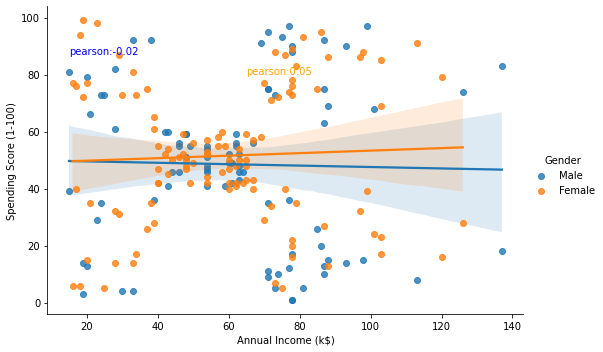

In [16]:
corr1,_=pearsonr(males_income.values,males_spending.values)
corr2,_=pearsonr(females_income.values,females_spending.values)
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=df,hue='Gender',aspect=1.5)
plt.text(15,87,'pearson:{:.2f}'.format(corr1),color='blue')
plt.text(65,80,'pearson:{:.2f}'.format(corr2),color='orange')
plt.show()

there is no correlation between spending and annual income

# clustering
* KMeans
* DBSCAN
* Meanshift

# KMeans

In [17]:
from sklearn.cluster import KMeans

In [18]:
data=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

# using Elbow graph to calculate the clusters number

In [19]:
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8,9]
clusters_inertia=[]
s_scores=[]
for n in n_clusters:
    KM_est=KMeans(n_clusters=n,init='k-means++').fit(data)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg=silhouette_score(data,KM_est.labels_)
    s_scores.append(silhouette_avg)

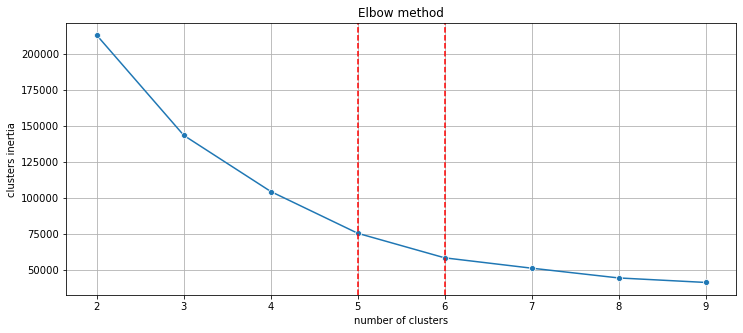

In [20]:
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,clusters_inertia,marker='o',ax=ax)
ax.set_title('Elbow method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('clusters inertia')
ax.axvline(5,ls='--',c='red')
ax.axvline(6,ls='--',c='red')
plt.grid()
plt.show()


the n_clusters will be 5 or 6

we will use 6 clusters

In [21]:
km_6_clusters=KMeans(n_clusters=6,init='k-means++').fit(data)
km6_clusters=data.copy()
km6_clusters.loc[:,'Cluster']=km_6_clusters.labels_


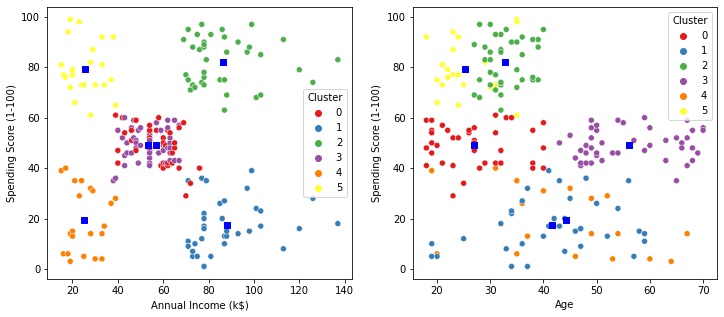

In [22]:
fig1,(axes)=plt.subplots(1,2,figsize=(12,5))
scat_1=sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data=km6_clusters,hue='Cluster',ax=axes[0],palette='Set1',legend='full')
sns.scatterplot('Age','Spending Score (1-100)',data=km6_clusters,hue='Cluster',ax=axes[1],palette='Set1',legend='full')
axes[0].scatter(km_6_clusters.cluster_centers_[:,1],km_6_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
axes[1].scatter(km_6_clusters.cluster_centers_[:,0],km_6_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
plt.show()

* cluster 0 younger client with medium annual income and medium annual score.
* cluster 1 younger client with high annual income and high annual score.
* cluster 2 medium age client with high annual income and high annual score.
* cluster 3 older client with medium annual income and medium annual score.
* cluster 4  client with high annual income and low annual score.
* cluster 5  client with low annual income and low annual score.

In [23]:
km6_cluster_sizes=km6_clusters.groupby('Cluster').size().to_frame()
km6_cluster_sizes.columns=['KM6_size']
km6_cluster_sizes

,KM6_size
Cluster,
0,38
1,35
2,39
3,45
4,21
5,22


# DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

choose the best combination for DBSCAN algorithm

In [25]:
from itertools import product
eps_values=np.arange(8,12)
min_samples=np.arange(3,10)
DBSCAN_params=list(product(eps_values,min_samples))

In [26]:
no_of_clusters=[]
sil_score=[]
for p in DBSCAN_params:
    DBS_clustering=DBSCAN(eps=p[0],min_samples=p[1]).fit(data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(data,DBS_clustering.labels_))

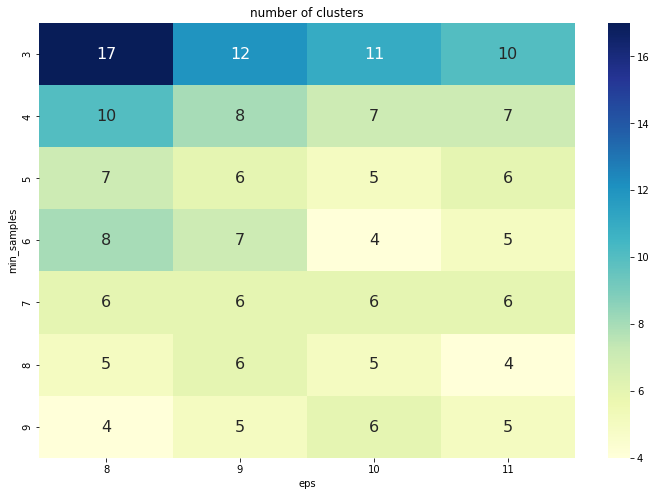

In [27]:
tmp=pd.DataFrame.from_records(DBSCAN_params,columns=['eps','min_samples'])
tmp['No_of_clusters']=no_of_clusters
pivot_1=pd.pivot_table(tmp,values='No_of_clusters',index='min_samples',columns='eps')
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1,annot=True,annot_kws={'size':16},cmap='YlGnBu',ax=ax)
ax.set_title('number of clusters')
plt.show()

In [52]:
DBS_clustering=DBSCAN(eps=12,min_samples=5).fit(data)
DBSCAN_clustered=data.copy()
DBSCAN_clustered.loc[:,'Cluster']=DBS_clustering.labels_

In [53]:
DBSCAN_clust_sizes=DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns=['DBSCAN_size']
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,36
0,101
1,6
2,6
3,34
4,17


there are 36 outliers

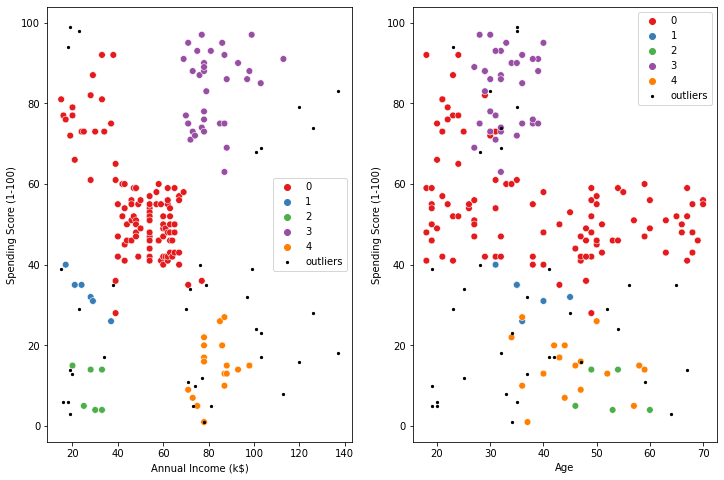

In [57]:
outliers=DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2,(axes)=plt.subplots(1,2,figsize=(12,8))
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],hue='Cluster',ax=axes[0],palette='Set1',legend='full',s=45)
sns.scatterplot('Age','Spending Score (1-100)',data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!==-1],hue='Cluster',ax=axes[1],palette='Set1',legend='full',s=45)
axes[0].scatter(outliers['Annual Income (k$)'],outliers['Spending Score (1-100)'],s=5,label='outliers',c='k')
axes[1].scatter(outliers['Age'],outliers['Spending Score (1-100)'],s=5,label='outliers',c='k')
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(),fontsize='10')
plt.setp(axes[1].get_legend().get_texts(),fontsize='10')
plt.show()

# agglomerative clustering

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
agglom=AgglomerativeClustering(n_clusters=5,linkage='average').fit(data)

In [76]:
data['labels']=agglom.labels_


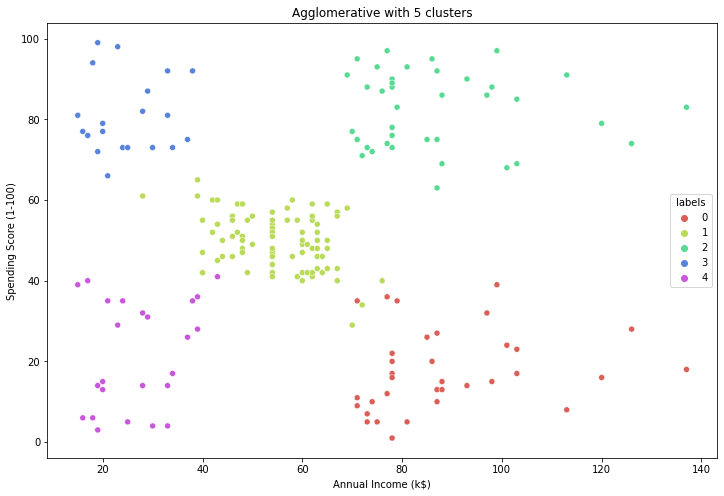

In [82]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=data['labels'],data=data,palette=sns.color_palette('hls',5))
plt.title('Agglomerative with 5 clusters')
plt.show()

In [84]:
agg_clustered=data.copy()
agg_clustered.loc[:,'Cluster']=agglom.labels_

In [86]:
agg_clust_sizes=agg_clustered.groupby('Cluster').size().to_frame()
agg_clust_sizes.columns=['agg_size']
agg_clust_sizes

,agg_size
Cluster,
0,35
1,82
2,39
3,20
4,24


In [87]:
clusters=pd.concat([km6_cluster_sizes,DBSCAN_clust_sizes,agg_clust_sizes],axis=1,sort=False)
clusters

,KM6_size,DBSCAN_size,agg_size
Cluster,,,
-1,NaN,36.0,NaN
0,38.0,101.0,35.0
1,35.0,6.0,82.0
2,39.0,6.0,39.0
3,45.0,34.0,20.0
4,21.0,17.0,24.0
5,22.0,NaN,NaN


# at the end:
# it seems that KMeans with 6 clusters is more balancied and we can detect the outliers from DBSCAN and can handle with them